In [104]:
import pandas as pd 
import numpy as np  
from supabase import create_client
from dotenv import load_dotenv
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [105]:
load_dotenv()

# Connect to the Supabase database
url: str = os.getenv("SUPABASE_URL")
key: str = os.getenv("SUPABASE_KEY")
db = create_client(url, key)


try:
    # Fetch and join tables using Supabase query interface
    response_league_positions_daily = db.from_("team_stats").select("*, teams(team_name)").execute()
except Exception as e:
    print("Error executing team_stats query:", e)

team_stats_df = pd.json_normalize(response_league_positions_daily.data) if response_league_positions_daily.data else pd.DataFrame()


In [106]:
team_stats_df['created_at'] = pd.to_datetime(team_stats_df['created_at']).dt.date
team_stats_df['created_at'] 
teamstats_df = team_stats_df.groupby(['team_key'])

print(team_stats_df.columns)

Index(['id', 'created_at', 'team_key', 'rank', 'points_for', 'points_change',
       'points_back', 'teams.team_name'],
      dtype='object')


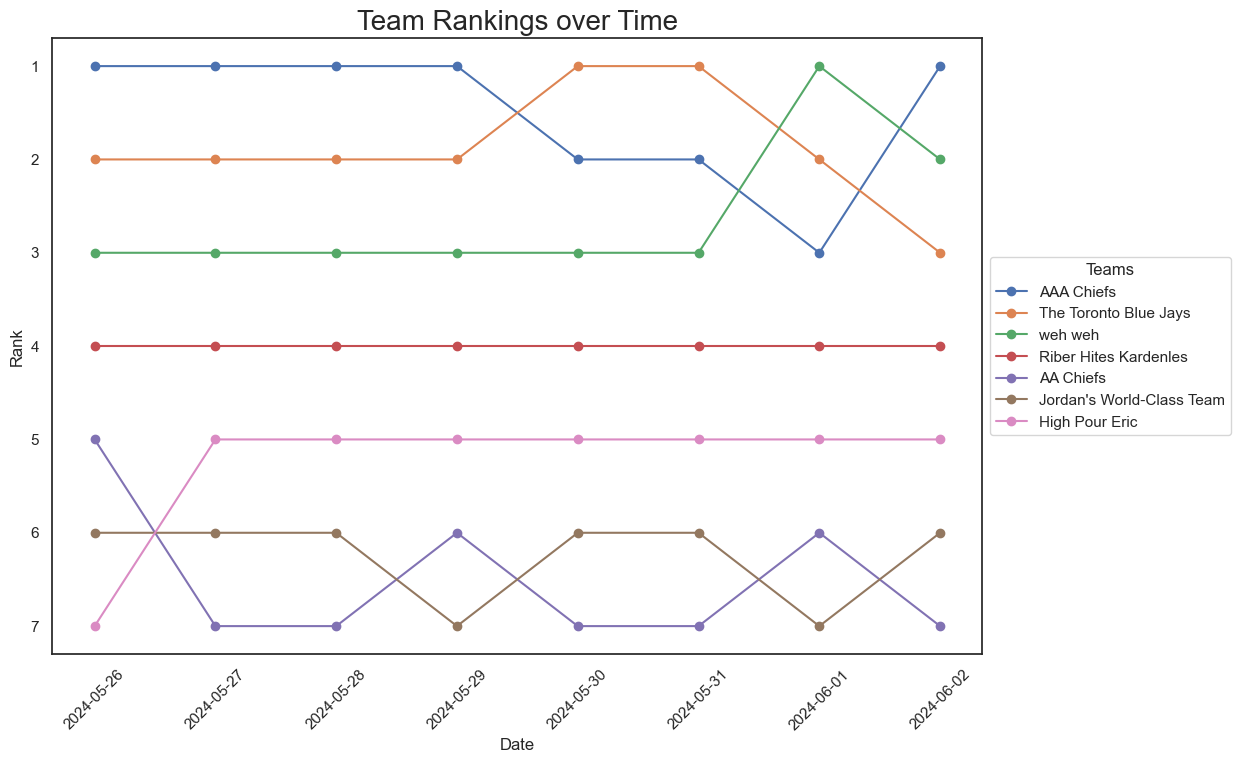

In [107]:
# Ensure 'created_at' is in datetime format
team_stats_df['created_at'] = pd.to_datetime(team_stats_df['created_at'])

# Sort the DataFrame by 'created_at' and 'rank'
team_stats_df = team_stats_df.sort_values(by=['created_at', 'rank'])

# Set the Seaborn theme for the plot without grid
sns.set_theme(style="white")

# Create the plot
plt.figure(figsize=(12, 8))

# Get the unique team names
teams = team_stats_df['teams.team_name'].unique()

# Plot each team's rankings
for team in teams:
    team_data = team_stats_df[team_stats_df['teams.team_name'] == team]
    plt.plot(team_data['created_at'], team_data['rank'], marker='o', label=team)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Rank')
plt.title('Team Rankings over Time', fontsize=20)
plt.gca().invert_yaxis()  # Invert y-axis to have rank 1 at the top
plt.xticks(rotation=45)

# Move the legend to the right of the plot
plt.legend(title='Teams', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot without grid
plt.show()


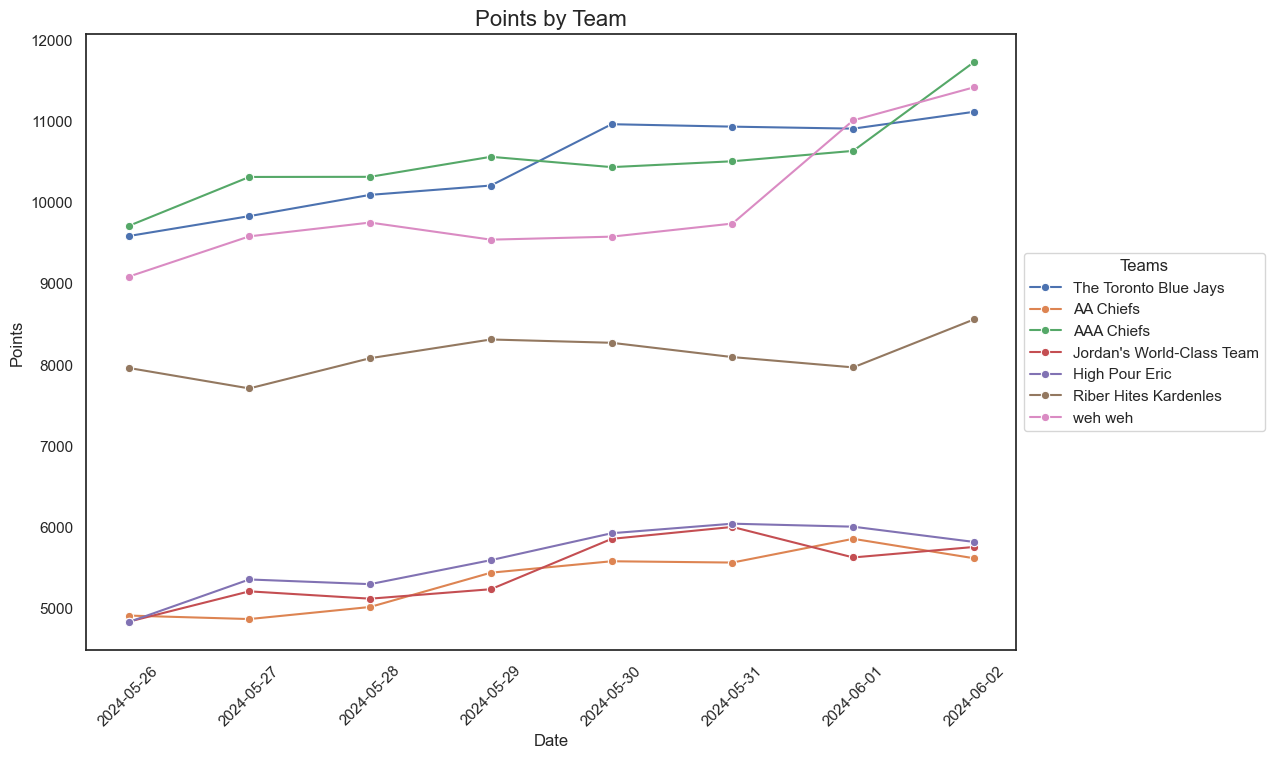

In [108]:
# Ensure 'created_at' is in datetime format
team_stats_df['created_at'] = pd.to_datetime(team_stats_df['created_at'])

# Sort the DataFrame by 'created_at' and 'team_key'
team_stats_df = team_stats_df.sort_values(by=['created_at', 'team_key'])

# Set the Seaborn theme
sns.set_theme(style="white")

# Create the plot
plt.figure(figsize=(12, 8))

# Create a lineplot
sns.lineplot(data=team_stats_df, x='created_at', y='points_for', hue='teams.team_name', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Points')
plt.title('Points by Team', fontsize=16)
plt.xticks(rotation=45)

# Move the legend to the right of the plot
plt.legend(title='Teams', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


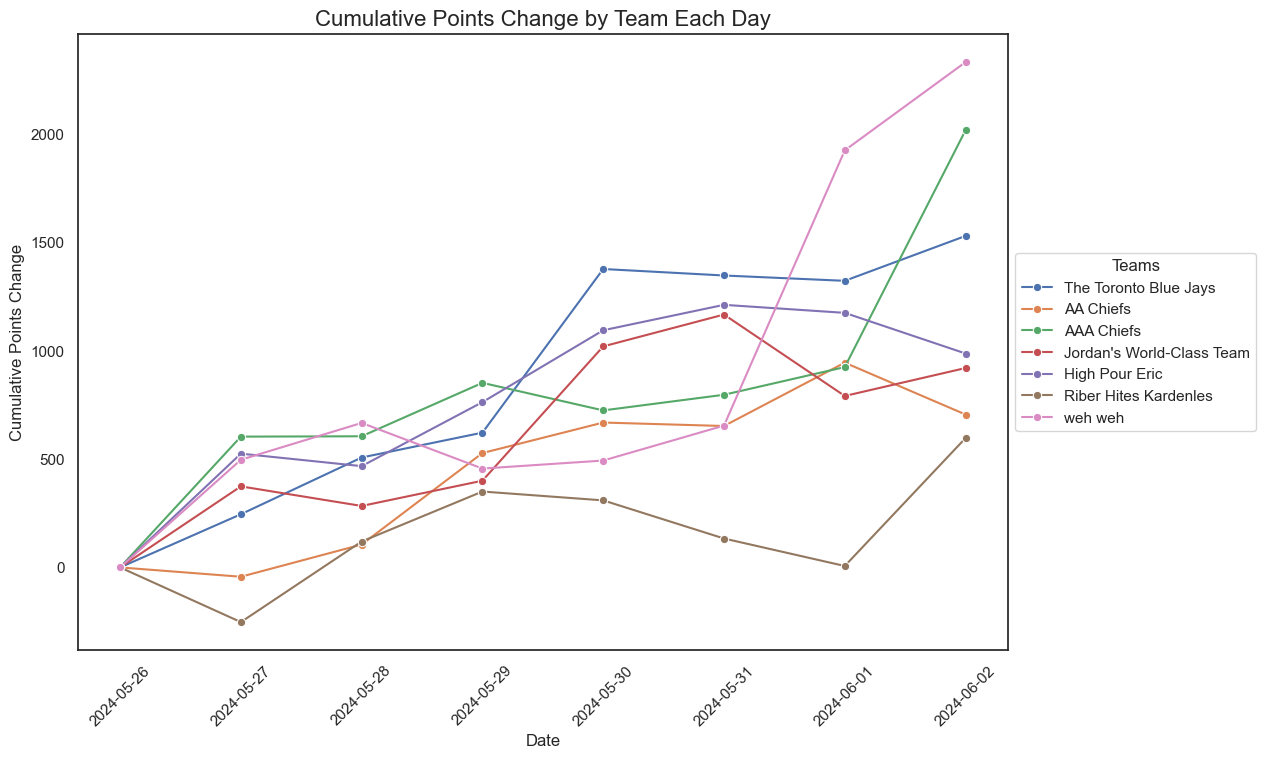

In [110]:
# Ensure 'created_at' is in datetime format
team_stats_df['created_at'] = pd.to_datetime(team_stats_df['created_at'])

# Identify the first date for each team
first_dates = team_stats_df.groupby('teams.team_name')['created_at'].min()

# Set points_change to zero for each team on their respective first dates
for team, first_date in first_dates.items():
    idx = (team_stats_df['teams.team_name'] == team) & (team_stats_df['created_at'] == first_date)
    team_stats_df.loc[idx, 'points_change'] = 0

# Calculate the cumulative points_change for each team starting from the second day
team_stats_df['cumulative_points_change'] = team_stats_df.groupby('teams.team_name')['points_change'].cumsum()

# Set the Seaborn theme
sns.set_theme(style="white")

# Create the plot
plt.figure(figsize=(12, 8))

# Create a lineplot
sns.lineplot(data=team_stats_df, x='created_at', y='cumulative_points_change', hue='teams.team_name', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Points Change')
plt.title('Cumulative Points Change by Team Each Day', fontsize=16)
plt.xticks(rotation=45)

# Move the legend to the right of the plot
plt.legend(title='Teams', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()